## Phân tích bảng dữ liệu mẫu lấy từ trang web vatgia.com

In [1]:
#import các packages cần thiết.
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#đọc file csv
df = pd.read_csv("F:\data learn/data6.csv", encoding = "utf8")

In [3]:
#cùng xem 5 dòng đầu bảng dữ liệu.
df.head()

,name,price,stars rate,reviews
0,Fujifilm Finepix Hs30exr / Hs33exr,7.000.000,3.8,4 đánh giá
1,Nikon Coolpix P7000,5.950.000,5.0,1 đánh giá
2,Panasonic Lumix Dmc-ts4 / Ft4,5.200.000,4.0,1 đánh giá
3,Máy ảnh Canon Ixus 190 Black,3.500.000,4.5,2 đánh giá
4,Sony Cybershot Dsc-h300 (Cũ),2.300.000,4.3,12 đánh giá


In [4]:
#bảng dữ liệu của chúng ta có 1056 dòng và 4 cột.
df.shape

(1056, 4)

In [5]:
#xem dữ liệu của chúng ta có chứa nan values không.
df.isnull().sum()

name            0
price         162
stars rate    282
reviews       282
dtype: int64

In [6]:
#bỏ các dòng có chứa nan values.
df.dropna(how="any", axis = 0, inplace = True)

In [7]:
df.head(10)

,name,price,stars rate,reviews
0,Fujifilm Finepix Hs30exr / Hs33exr,7.000.000,3.8,4 đánh giá
1,Nikon Coolpix P7000,5.950.000,5.0,1 đánh giá
2,Panasonic Lumix Dmc-ts4 / Ft4,5.200.000,4.0,1 đánh giá
3,Máy ảnh Canon Ixus 190 Black,3.500.000,4.5,2 đánh giá
4,Sony Cybershot Dsc-h300 (Cũ),2.300.000,4.3,12 đánh giá
5,Canon Powershot A3300 Is - Mỹ / Canada,1.700.000,4.4,32 đánh giá
7,Sony Cybershot Dsc-rx100 (Cũ),4.500.000,3.7,3 đánh giá
8,Canon Powershot A3200 Is - Mỹ / Canada (Cũ),900.000,3.9,56 đánh giá
10,Sony Cyber-shot Dsc - Rx100m3,6.900.000,4.0,2 đánh giá
11,Canon Ixus 117 Hs - Châu âu,3.200.000,5.0,1 đánh giá


In [8]:
#cùng nhìn lại, ta thấy bảng của chúng ta không còn nan values nào.
df.isnull().sum()

name          0
price         0
stars rate    0
reviews       0
dtype: int64

In [9]:
#ta thấy 2 cột "price" và "reviews" vẫn ở dạng object, nên chúng ta sẽ xử lí ở dưới.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        774 non-null    object 
 1   price       774 non-null    object 
 2   stars rate  774 non-null    float64
 3   reviews     774 non-null    object 
dtypes: float64(1), object(3)
memory usage: 30.2+ KB


In [10]:
#chúng ta sử dụng 1 function để chiết suất phần dữ liệu số từ cột "reviews".
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
#và sử dụng nó trực tiếp lên cột "reviews"
df['no_reviews']=df['reviews'].apply(lambda x: find_number(x))

In [11]:
#sau khi có cột "no_reviews", chúng ta không cần đến cột "reviews" ban đầu nữa.
df.drop(["reviews"], axis =1, inplace = True)

In [12]:
df.head()

,name,price,stars rate,no_reviews
0,Fujifilm Finepix Hs30exr / Hs33exr,7.000.000,3.8,4
1,Nikon Coolpix P7000,5.950.000,5.0,1
2,Panasonic Lumix Dmc-ts4 / Ft4,5.200.000,4.0,1
3,Máy ảnh Canon Ixus 190 Black,3.500.000,4.5,2
4,Sony Cybershot Dsc-h300 (Cũ),2.300.000,4.3,12


In [13]:
#cùng nhìn qua các đơn giá có trong cột "price".
df.price.value_counts()

Liên hệ gian hàng    181
1.900.000             27
5.500.000             26
1.500.000             25
3.300.000             23
                    ... 
2.350.000              1
1.350.000              1
5.050.000              1
650.000                1
2.120.000              1
Name: price, Length: 135, dtype: int64

In [14]:
#chúng ta sẽ bỏ các dòng có đơn giá không xác định
drop_index = df.price[df.price =="Liên hệ gian hàng"].index

In [15]:
df.drop(drop_index,axis =0,inplace = True)

In [16]:
#sau một vài bước xử lí, bảng của chúng ta chỉ còn 593 dòng, mình sẽ chỉ sử dụng từng đó dữ liệu trong bản phân tích lần này.
df.shape

(593, 4)

In [17]:
#cùng xử lý để đưa 2 cột "price" và "stars rate" từ dạng object thành dạng float.
df["price"] = df["price"].str.replace(".","")
df["price"] = df["price"].astype("float32")
df["stars rate"] = df["stars rate"].astype("float32")

In [18]:
df["no_reviews"] = df["no_reviews"].astype("float32")

In [19]:
#có thể thấy các số liệu của chúng ta đều được đưa về dạng float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        593 non-null    object 
 1   price       593 non-null    float32
 2   stars rate  593 non-null    float32
 3   no_reviews  593 non-null    float32
dtypes: float32(3), object(1)
memory usage: 16.2+ KB


In [20]:
#loại bỏ các dòng trùng lặp
df.drop_duplicates(inplace = True)

In [21]:
df.shape

(534, 4)

In [22]:
#cùng xem một số thông số từ bảng dữ liệu của chúng ta
df.describe()

,price,stars rate,no_reviews
count,534.00,534.000000,534.000000
mean,3928367.00,4.269475,5.340824
std,3951335.25,0.542478,9.185188
min,600000.00,1.000000,1.000000
25%,1600000.00,4.000000,2.000000
50%,2800000.00,4.300000,3.000000
75%,4575000.00,4.700000,5.000000
max,37300000.00,5.000000,72.000000


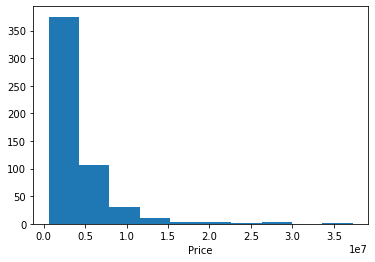

In [25]:
#cùng vẽ biểu đồ histogram để theo dõi phân bổ đơn giá của các sản phẩm, có thể thấy đơn giá tập trung ở mức dưới 5 triệu đồng
plt.hist(df.price)
plt.xlabel("Price")
plt.show()

In [26]:
#chúng ta cũng có thể chia nhỏ các đơn giá thành các khoảng nhỏ hơn
range = ["dưới 8 triệu", "8-15 triệu", "15-22 triệu","22-30 triệu","30-37 triệu"]
range_counts = pd.cut(df.price, 5, labels = range ).value_counts()

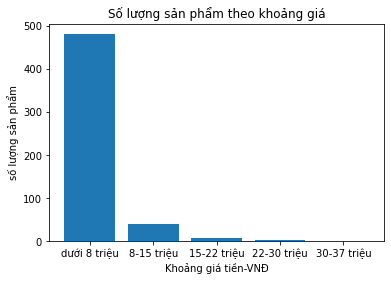

In [27]:
plt.bar(range, height =range_counts)
plt.xlabel("Khoảng giá tiền-VNĐ")
plt.ylabel("số lượng sản phẩm")
plt.title("Số lượng sản phẩm theo khoảng giá")
plt.show()

In [28]:
#cùng xem một số sản phẩm có lượt đánh giá cao nhất
most_reviews_product = [df["name"].groupby(df["no_reviews"]).agg("max")]

In [29]:
most_reviews_product[0]

no_reviews
1.0                                       Sony Ilce-5100l
2.0                   Sony Cybershot Rx10 Iv - Dsc-rx10m4
3.0                              Sony Cybershot Dsc-wx300
4.0                         Sony Cybershot Dsc-wx200 Back
5.0                         Sony Cybershot Dsc-wx150 (Cũ)
6.0                               Sony Cybershot Dsc-w810
7.0     Sony Cybershot Dsc-wx50 (bc E32/ Pc E32/ Sc E3...
8.0     Sony Cybershot Dsc-w630 (bc E32/ Nc E32/ Pc E3...
9.0                               Sony Cybershot Dsc-tx55
10.0                        Sony Cybershot Dsc-w830 Black
11.0                             Nikon Coolpix S2600 (Cũ)
12.0    Sony Cybershot Dsc-w670 (bc E32/ Lc E32/ Pc E3...
14.0        Canon Powershot G1 X / G1x - Mỹ / Canada (Cũ)
16.0             Canon Powershot S5 Is - Mỹ / Canada (Cũ)
17.0                         Canon Powershot G7 X Mark Ii
18.0                          Fujifilm Finepix S2980 (Cũ)
20.0           Canon Powershot Sx40 Hs - Mỹ / Canada (Cũ)
23.

In [30]:
#cùng xem điểm đánh giá trung bình đối với các sản phẩm có trên và dưới 30 lượt đánh giá lần lượt.
max_reviews = df.loc[df["no_reviews"]>30]["stars rate"].mean()
min_reviews = df.loc[df["no_reviews"]<30]["stars rate"].mean()
print(f"The average star for product with reviews more than 30: {max_reviews}")
print(f"The average star for product with reviews less than 30: {min_reviews}")


The average star for product with reviews more than 30: 4.12666654586792
The average star for product with reviews less than 30: 4.273938179016113


In [31]:
#cùng xem với các điểm "sao" nhận được, thì các sản phẩm sẽ có giá trung bình là bao nhiêu?
df["price"].groupby(df["stars rate"]).agg("mean")

stars rate
1.0    1600000.000
2.0    1300000.000
2.3    1200000.000
2.5    4066666.750
3.0    2117058.750
3.1    1200000.000
3.3    1783333.375
3.4    1000000.000
3.5    2139333.250
3.6    2755555.500
3.7    2750000.000
3.8    3084615.500
3.9    1433333.375
4.0    3342553.250
4.1    3880769.250
4.2    3228571.500
4.3    3570800.000
4.4    3490909.000
4.5    5513318.000
4.6    4984615.500
4.7    5685625.000
4.8    3375833.250
5.0    4736305.500
Name: price, dtype: float32

In [33]:
#cùng xem các số liệu cột có mối quan hệ tương quan nào không?
usecol = df.drop(["name"], axis =1)
usecol.corr()

,price,stars rate,no_reviews
price,1.000000,0.211244,-0.089659
stars rate,0.211244,1.000000,-0.061655
no_reviews,-0.089659,-0.061655,1.000000


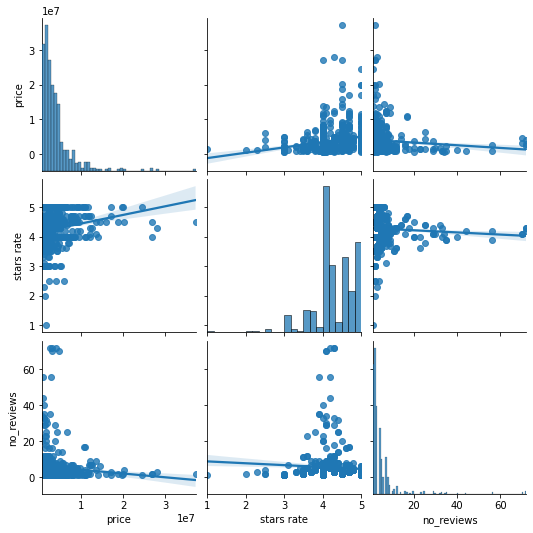

In [34]:
#sử dụng biểu đồ để dễ quan sát hơn
sns.pairplot(usecol, kind = "reg")
plt.show()